# Plot runs
This notebook plots the search algorithm curves for various search spaces.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

sys.path.append("..")
from utils.helpers import configure_seaborn
import pandas as pd
configure_seaborn()

## NAS-Bench-201

In [32]:
df_201 = pd.read_csv("results.csv")
df_201.head()

,Unnamed: 0,algorithm,run,iteration,score
0,0,NRPA,0,0,85.96
1,1,NRPA,0,1,88.99
2,2,NRPA,0,2,88.99
3,3,NRPA,0,3,88.99
4,4,NRPA,0,4,88.99


In [33]:
print(f"There are {len(np.unique(df_201['run']))} runs")
algos = np.unique(df_201["algorithm"])
algo_dict = {e: None for e in algos}

There are 19 runs


In [34]:
for alg_name in algos:
    #Get average reward for NRPA
    df_grouped = df_201[df_201["algorithm"] == alg_name]
    algo_dict[alg_name] = df_grouped.groupby(["iteration", "run"])["score"].mean().unstack().values.T


[[85.96 88.99 88.99 ... 91.57 91.57 91.57]
 [77.43 88.73 88.73 ... 91.57 91.57 91.57]
 [88.72 89.61 89.65 ... 91.57 91.57 91.57]
 ...
 [87.39 87.39 88.18 ... 91.57 91.57 91.57]
 [87.8  87.8  87.8  ... 91.57 91.57 91.57]
 [88.83 88.83 88.83 ... 91.57 91.57 91.57]]
[[74.54 88.01 88.01 ... 91.38 91.38 91.38]
 [86.48 88.18 88.18 ... 91.57 91.57 91.57]
 [88.76 89.73 89.73 ... 91.57 91.57 91.57]
 ...
 [89.47 89.47 90.07 ... 91.57 91.57 91.57]
 [85.82 88.63 88.63 ... 91.57 91.57 91.57]
 [87.15 87.15 87.17 ... 91.57 91.57 91.57]]


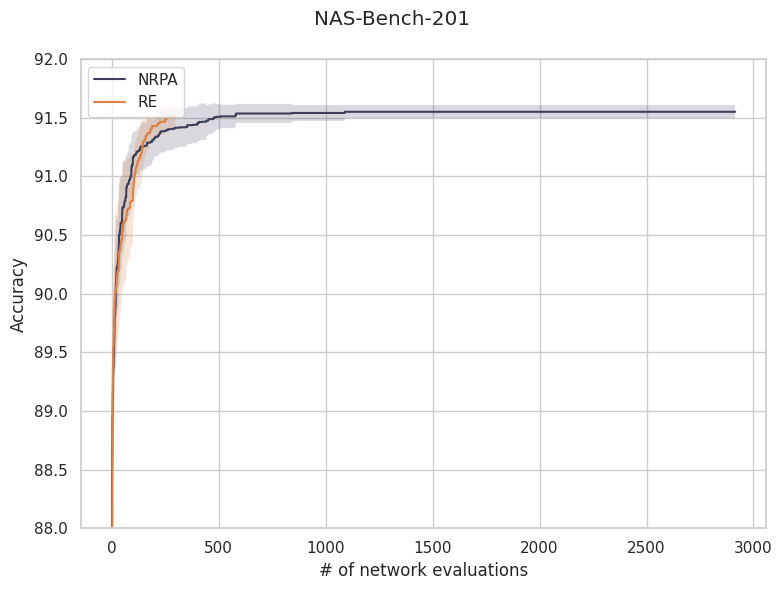

In [35]:
f, ax = plt.subplots(1,1,figsize=(8,6))

for alg_name, values in algo_dict.items():
    print(algo_dict[alg_name])
    ax.plot(np.mean(values, axis=0), label=alg_name)
    ax.fill_between(range(len(values[0])),
                    np.mean(values, axis=0) - np.std(values, axis=0),
                    np.mean(values, axis=0) + np.std(values, axis=0),
                    alpha=0.2)


ax.set_ylabel("Accuracy"); ax.set_xlabel("# of network evaluations")
f.suptitle("NAS-Bench-201")
ax.legend()
plt.ylim([88, 92])
plt.tight_layout()
plt.show()
